<a href="https://colab.research.google.com/github/Sayan51/Student-Performance-Prediction/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Student Performance Prediction using Machine Learning

This project builds a regression model to predict a student's final math grade (G3)
based on demographic, academic, and social attributes.

## 🎯 Problem Statement

The goal of this project is to predict students' final math grade (G3)
using historical academic and behavioral data.

This is a supervised regression problem where:
- Input: Student attributes
- Output: Final Grade (G3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

## 📥 Data Loading

The dataset is loaded from the student-mat.csv file.
The separator used is ";".

In [3]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 🔎 Data Overview

We inspect the dataset structure, missing values, and summary statistics.

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 📊 Correlation Analysis

We check how strongly different features correlate with the final grade (G3).

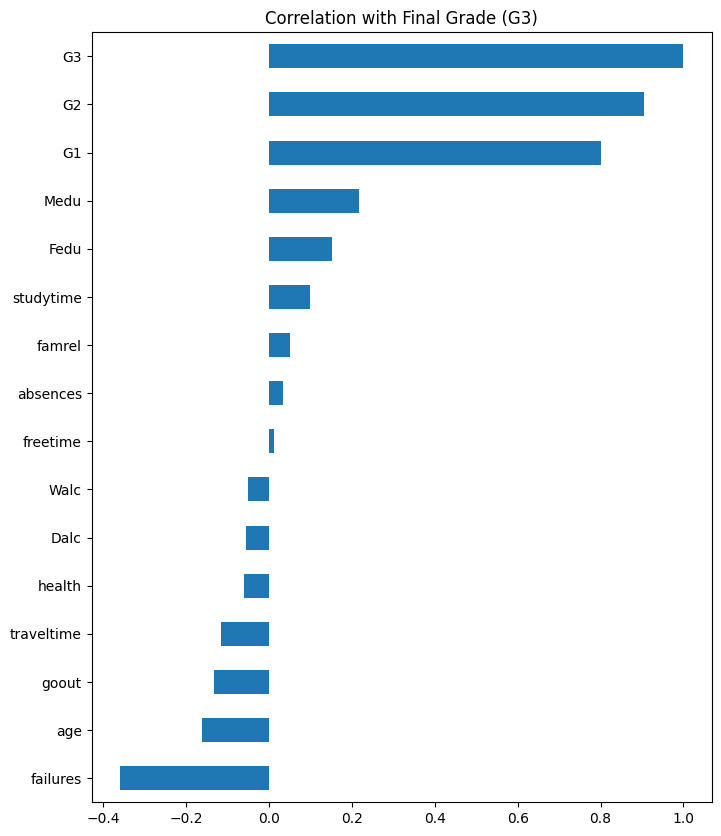

In [6]:
plt.figure(figsize=(8,10))
data.corr(numeric_only=True)["G3"].sort_values().plot(kind="barh")
plt.title("Correlation with Final Grade (G3)")
plt.show()

## ⚙ Feature Engineering & Preprocessing

We:
- Separate target variable (G3)
- Convert categorical variables using one-hot encoding

In [9]:
y = data["G3"]

X = data.drop("G3", axis=1)

X = pd.get_dummies(X, drop_first=True)

X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


## 🔀 Train-Test Split

We split the dataset into:
- 80% Training Data
- 20% Testing Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🤖 Model Training

We use a Random Forest Regressor because:
- It handles non-linear relationships
- It performs well on structured datasets

In [12]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

## 📊 Model Evaluation

We evaluate performance using:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score

In [15]:
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1.1688414687476765
RMSE: 1.9736482786355967
R2 Score: 0.8100327457509613


## 📌 Feature Importance

We analyze which features influenced grade prediction the most.

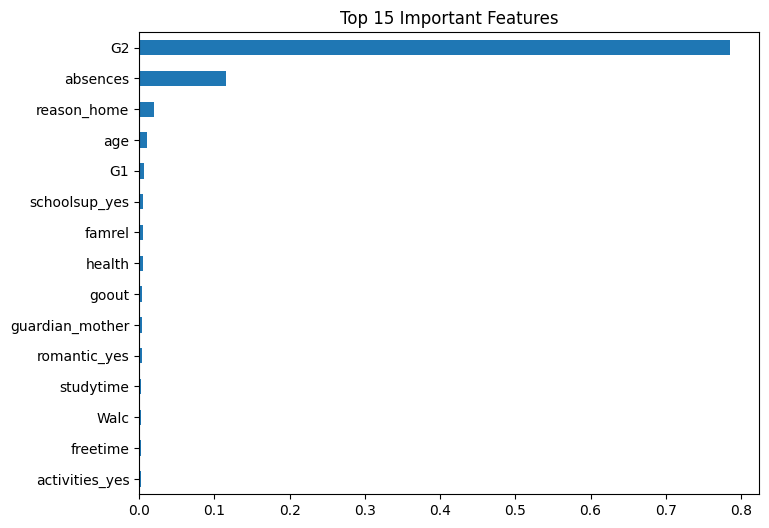

In [16]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().tail(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Important Features")
plt.show()

## ⚠ Limitations

- Dataset is limited in size.
- External factors like teacher quality are not included.
- Model performance depends on feature quality.

## 🚀 Future Improvements

- Try XGBoost or Gradient Boosting
- Perform hyperparameter tuning
- Deploy as a simple web app
- Add feature scaling comparison